# Data Inspection
Using forward scattering information.

In [1]:
import numpy as np
import os
from scipy import *
import pandas as pd
from matplotlib.pyplot import *
from sklearn import *

# Functions to load the time domain data, transform it to the FFT space, PCA space, etc...

In [2]:
def load_data(npoints, folder_path = "D:data OT//"):
    """
    Load the data, added targets2 for making a pool for the stratified 
    cross-validation procedure
    """

    path_files_TD = [folder_path+f for f in os.listdir(folder_path) if f.endswith('.dat')]
        
    #store the info for each file
    target = [] #type of target
    target_fix=[]
    particle_group=[]
    x_data = [] #xdata
    y_data = [] #ydata
    sum_data = [] #intensity data


    for i in range(0,len(path_files_TD)):

        current_path = path_files_TD[i]

        current_df = pd.read_csv(current_path,skiprows=2,header=None,delimiter='\t')
        
        #max n_segments possible
        n_segments = int(len(current_df[0])/npoints)
        print(n_segments)
        
        xx = np.array(current_df[0])[0:n_segments*npoints]
        yy = np.array(current_df[1])[0:n_segments*npoints]
        sums = np.array(current_df[2])[0:n_segments*npoints]

        #alterei isto que me estava a dar problemas com segmentos de tamanho variável
        x_data.append(np.array([xx[int(i*npoints):int((i+1)*npoints)] for i in range(0, n_segments)]))
        y_data.append(np.array([yy[int(i*npoints):int((i+1)*npoints)] for i in range(0, n_segments)]))
        sum_data.append(np.array([sums[int(i*npoints):int((i+1)*npoints)] for i in range(0, n_segments)]))
        target_fix.append(current_path.split('//')[-1].split('.')[0][:-1])

        print(current_path + " Read "+ str(n_segments) + " segments", end = '\r')

        for i in range(0,int(len(xx)/npoints)):

            target.append(current_path.split('//')[-1].split('.')[0][:-1])
            
            #this will create a new index that corresponds to particle number, to be grouped in the cross-validation strategy
            particle_group.append(current_path.split('//')[-1].split('.')[0][-1:])

    return target, np.array(x_data), np.array(y_data), np.array(sum_data), np.array(particle_group), target_fix


# Load the data

In [3]:
#folder = "D:data OT - TT//TotalData//"  # for Windows
folder = "../Data/Experimental data/Synthetic Particles (IAC, 21)/"  # for Linux
npoints   =  50000
target, x_data, y_data, sum_data, particle_group,target_fix = load_data(npoints, folder)

30
30/Data/Experimental data/Synthetic Particles (IAC, 21)/4umPOLY3.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/3umPOLY1.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/8umPOLY3.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/4umPOLY6.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/8umPMMA4.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/water3.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/water1.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/8umPMMA2.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/water4.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/8umPMMA3.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/3umPMMA2.dat Read 30 segments
30/Data/Experimental data/Synthetic Particles (IAC, 21)/3

In [14]:
print(particle_group)

['' '' '' ... '' '' '']


# Brownian Motion 2d

<IPython.core.display.Javascript object>


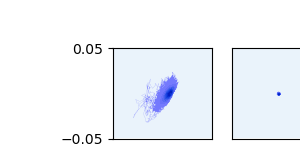

/home/vic/anaconda3/envs/keras_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/home/vic/anaconda3/envs/keras_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
/home/vic/anaconda3/envs/keras_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/home/vic/anaconda3/envs/keras_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
/home/vic/anaconda3/envs/keras_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification i

In [5]:
from scipy.stats import *
%matplotlib notebook
subplots(figsize=[9,4])

end = 30000

for ind in range(0,len(x_data),6):
    subplot(3,len(x_data)/6,ind/6+1)
    
    x_d = np.ndarray.flatten(x_data[ind])[:end]
    y_d = np.ndarray.flatten(y_data[ind])[:end]

    xmin, xmax = -0.05, 0.05
    ymin, ymax = -0.05, 0.05

    xx, yy = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x_d, y_d])
    kernel = gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    ax = gca()
    ax.set_xticks([])
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_yticks([ymin,ymax])
        
        
    title(target_fix[ind])
    #hexbin(x_d,y_d, cmap='Blues', gridsize=40,alpha=0.5)
    contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
    plot(x_d,y_d, alpha=0.5, color='b', lw=0.1)
    if ind!=0:
        ax = gca()
        ax.set_yticks([])
        
for ind in range(1,len(x_data),6):
    subplot(3,len(x_data)/6,6+ind/6+1)

    x_d = np.ndarray.flatten(x_data[ind])[:end]
    y_d = np.ndarray.flatten(y_data[ind])[:end]

    xmin, xmax = -0.05, 0.05
    ymin, ymax = -0.05, 0.05

    xx, yy = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x_d, y_d])
    kernel = gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    ax = gca()
    ax.set_xticks([])
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_yticks([ymin,ymax])
        
    
    #hexbin(x_d,y_d, cmap='Blues', gridsize=40,alpha=0.5)
    contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
    plot(x_d,y_d, alpha=0.5, color='b', lw=0.1)
    if ind!=1:
        ax = gca()
        ax.set_yticks([])
        
for ind in range(5,len(x_data),6):
    subplot(3,len(x_data)/6,12+ind/6+1)

    x_d = np.ndarray.flatten(x_data[ind])[:end]
    y_d = np.ndarray.flatten(y_data[ind])[:end]

    xmin, xmax = -0.05, 0.05
    ymin, ymax = -0.05, 0.05
    
    ax=gca()
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xticks([xmin,xmax])
    ax.set_yticks([ymin,ymax])
        
    xx, yy = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x_d, y_d])
    kernel = gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    #hexbin(x_d,y_d, cmap='Blues', gridsize=40,alpha=0.5)
    contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
    plot(x_d,y_d, alpha=0.5, color='b', lw=0.1)
    if ind!=2:
        ax = gca()
        ax.set_yticks([])



<IPython.core.display.Javascript object>


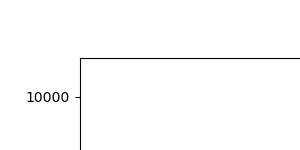

(array([4.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00,
        6.0000e+00, 1.0000e+00, 2.0000e+00, 7.0000e+00, 4.0000e+00,
        8.0000e+00, 2.3000e+01, 2.6000e+01, 4.1000e+01, 3.7000e+01,
        6.6000e+01, 8.7000e+01, 9.8000e+01, 1.3800e+02, 1.5100e+02,
        1.7200e+02, 1.4100e+02, 2.7500e+02, 4.0400e+02, 5.9300e+02,
        8.5100e+02, 1.5120e+03, 1.5900e+03, 1.2830e+03, 2.4370e+03,
        3.0310e+03, 3.9950e+03, 4.9170e+03, 6.5080e+03, 1.0654e+04,
        6.3710e+03, 9.9540e+03, 1.0461e+04, 9.7110e+03, 8.4470e+03,
        5.1880e+03, 5.7220e+03, 1.9050e+03, 1.6580e+03, 9.1700e+02,
        3.8200e+02, 1.2500e+02, 5.6000e+01, 2.2000e+01, 1.0000e+01]),
 array([-0.0288  , -0.027814, -0.026828, -0.025842, -0.024856, -0.02387 ,
        -0.022884, -0.021898, -0.020912, -0.019926, -0.01894 , -0.017954,
        -0.016968, -0.015982, -0.014996, -0.01401 , -0.013024, -0.012038,
        -0.011052, -0.010066, -0.00908 , -0.008094, -0.007108, -0.006122,
        -0.005136, -0.

In [6]:
ind=0
end=100000
x_d = np.ndarray.flatten(x_data[ind])[:end]
subplots()
n_bins=50
hist(x_d, bins=n_bins,lw=0.1,color='gray',ec='k')